In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

## Generating DataSets

In [5]:
X, Y = make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

In [12]:
X, Y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=2,
    random_state=11,
)
print(X.shape, Y.shape)

(500, 2) (500,)


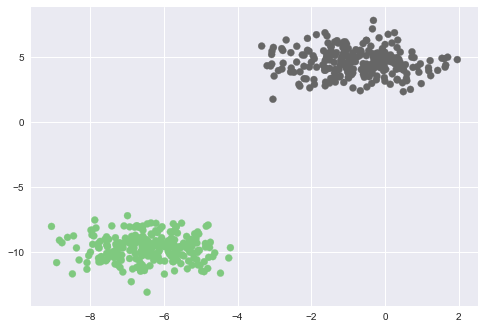

In [13]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.Accent)
plt.show()

## Model AND Helper Functions

### Sigmoid

In [14]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [17]:
#Broadcasting
z = np.array([1, 2, 3, 4, 5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

### Implementing the Perceptron 
 - Learn the weights
 - Reduce the Loss
 - Make Predictions

In [50]:
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def loss(X, Y, weights):
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_) - (1 - Y)*np.log(1 - Y_))
    return cost

def update(X, Y, weights, learning_rate):
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)

    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))

    return weights

def train(X, Y, learning_rate, max_epochs):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    weights = np.zeros(X.shape[1])

    for epoch in range(max_epochs):

        weights = update(X, Y, weights, learning_rate)

        if epoch%10 == 0:
            l = loss(X, Y, weights)
            print("Epoch -- %d loss -- %.4f"%(epoch, l))
    
    return weights

In [51]:
weights = train(X, Y, learning_rate=0.5, max_epochs=100)
print(weights)

Epoch -- 0 loss -- 0.0018
Epoch -- 10 loss -- 0.0016
Epoch -- 20 loss -- 0.0015
Epoch -- 30 loss -- 0.0014
Epoch -- 40 loss -- 0.0013
Epoch -- 50 loss -- 0.0012
Epoch -- 60 loss -- 0.0011
Epoch -- 70 loss -- 0.0010
Epoch -- 80 loss -- 0.0010
Epoch -- 90 loss -- 0.0009
[0.05805875 0.58962195 1.9390397 ]


### Make Predictions

In [64]:
def predictions(X_test, weights, labels = True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((ones, X_test))
    
    probs = predict(X_test, weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [65]:
weights

array([0.05805875, 0.58962195, 1.9390397 ])

In [66]:
x1 = np.linspace(-10, 2, 10)
print(x1)
x2 = -(weights[0] + weights[1]*x1)/(weights[2])
print(x2)

[-10.          -8.66666667  -7.33333333  -6.          -4.66666667
  -3.33333333  -2.          -0.66666667   0.66666667   2.        ]
[ 3.01085156  2.60541242  2.19997328  1.79453413  1.38909499  0.98365585
  0.5782167   0.17277756 -0.23266158 -0.63810073]


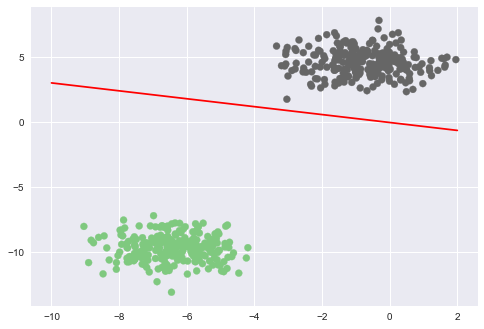

In [67]:
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.Accent)
plt.plot(x1, x2, c = 'red')
plt.show()

In [70]:
## Accuracy
Y_ = predictions(X, weights, labels=True)
training_acc = np.sum([Y==Y_])/Y.shape[0]
print(training_acc)

1.0
